In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [17]:
def SIR_Full(u, t, alpha, beta, gamma, delta, mu, eta):
    du = np.zeros(3)
    du[0] = alpha * (1 - eta) - beta*u[0]*u[1] - mu*u[0]
    du[1] = beta * u[0]*u[1] - (mu + gamma + delta) * u[1]
    du[2] = delta * u[1] - mu * u[2] + alpha * eta
    return du

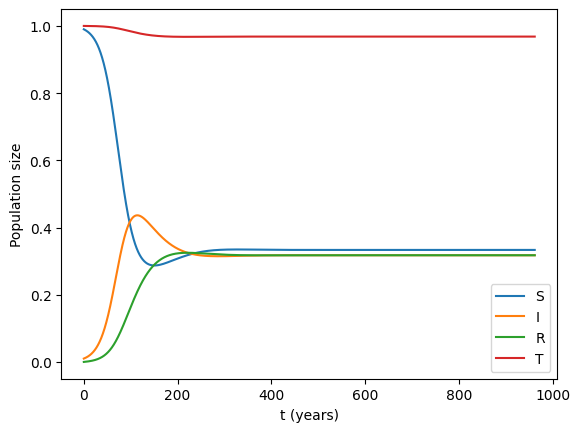

In [29]:
R0 = 3
mu = 1. / (75*52)
gamma = 0.1 * mu
delta = mu
alpha = mu
beta = R0 * mu * (mu + gamma + delta) / alpha
eta = 0

t = np.linspace(0, 50000, 40001)

u = odeint(SIR_Full, [.99, .01, 0], t, args=(alpha, beta, gamma, delta, mu, eta))

plt.plot(t/52., u[:,0], color='C0', label="S")
plt.plot(t/52., u[:,1], color='C1', label="I")
plt.plot(t/52., u[:,2], color='C2', label="R")
plt.plot(t/52., np.sum(u, axis=1), color='C3', label="T")
plt.legend()
plt.xlabel("t (years)")
plt.ylabel("Population size")

u0 = u[-1]

Text(0, 0.5, 'Population size')

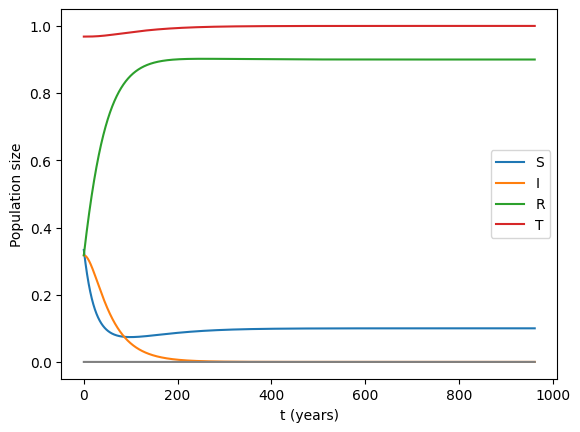

In [34]:
R0 = 3
mu = 1. / (75*52)
gamma = 0.1 * mu
delta = mu
alpha = mu
beta = R0 * mu * (mu + gamma + delta) / alpha
eta = .9

t = np.linspace(0, 50000, 40001)

u = odeint(SIR_Full, u0, t, args=(alpha, beta, gamma, delta, mu, eta))

plt.plot(t/52., u[:,0], color='C0', label="S")
plt.plot(t/52., u[:,1], color='C1', label="I")
plt.plot(t/52., u[:,2], color='C2', label="R")
plt.plot(t/52., np.sum(u, axis=1), color='C3', label="T")
plt.plot(t/52, t*0, color="gray")
plt.legend()
plt.xlabel("t (years)")
plt.ylabel("Population size")

In [35]:
def SIR_CP(u, t, beta, delta, epsilon):
    du = np.zeros(3)
    du[0] = - beta*u[0]*u[1] - epsilon*u[0]
    du[1] = beta * u[0]*u[1] - delta * u[1]
    du[2] = delta * u[1] + epsilon*u[0]
    return du

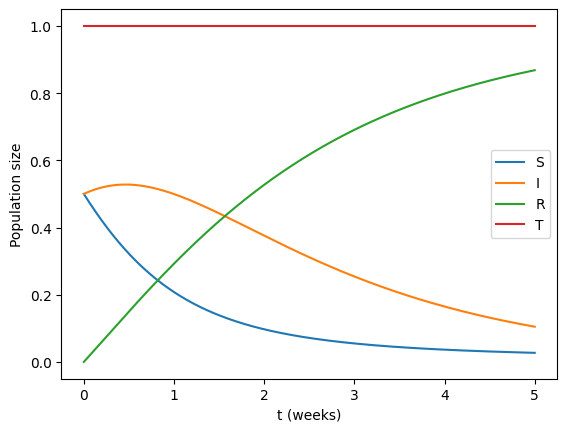

In [56]:
R0 = 3
delta = 1.0 / 2
beta = R0 * delta
epsilon = .1

t = np.linspace(0, 5, 1000)

u = odeint(SIR_CP, [.5, .5, 0], t, args=(beta, delta, epsilon))

plt.plot(t, u[:,0], color='C0', label="S")
plt.plot(t, u[:,1], color='C1', label="I")
plt.plot(t, u[:,2], color='C2', label="R")
plt.plot(t, np.sum(u, axis=1), color='C3', label="T")
plt.legend()
plt.xlabel("t (weeks)")
plt.ylabel("Population size")

u0 = u[-1]